In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("mobiles1.csv")


In [3]:
adf = pd.read_csv("mobiles1.csv", usecols =['name', 'price', 'rating','memory']) # android raw
idf = pd.read_csv("apple_products.csv", usecols=['Product Name','Mrp','Star Rating','Ram']) # iphone raw

adf['Ram'] = adf['memory'].str[:1]
adf = adf.drop(columns=['memory'])

idf['Ram'] = adf['Ram'].str[:1]

#   1 USD = 75.31 INR
adf['Price_USD']=adf.price/75.31
adf['Rating per dollar'] = adf.rating / adf.Price_USD

idf['Price_USD'] = idf['Mrp']/75.31
idf['Rating per dollar'] = idf['Star Rating'] /idf['Price_USD']

adf['Ram per Dollar'] = adf['Ram'].astype(int) /adf['Price_USD']
idf['Ram per Dollar'] = idf['Ram'].astype(int) /idf['Price_USD']

In [4]:
adf  # android cleaned


,name,price,rating,Ram,Price_USD,Rating per dollar,Ram per Dollar
0,"Redmi 8 (Ruby Red, 64 GB)",9999,4.4,4,132.771212,0.033140,0.030127
1,"Realme 5i (Aqua Blue, 64 GB)",10999,4.5,4,146.049661,0.030811,0.027388
2,"Realme 5i (Aqua Blue, 128 GB)",11999,4.5,4,159.328110,0.028244,0.025105
3,"Realme 5i (Forest Green, 128 GB)",11999,4.5,4,159.328110,0.028244,0.025105
4,"Realme C2 (Diamond Blue, 32 GB)",7499,4.4,3,99.575090,0.044188,0.030128
...,...,...,...,...,...,...,...
979,"Micromax Bharat 4 (Black, 8 GB)",3590,3.8,1,47.669632,0.079715,0.020978
980,"Nextbit Robin (Ember, 32 GB)",19999,4.0,3,265.555703,0.015063,0.011297
981,"Gionee A1 Plus (Mocha Gold, 64 GB)",10499,4.1,4,139.410437,0.029410,0.028692
982,"XOLO Omega 5.0 (Black, 8 GB)",8990,3.8,1,119.373257,0.031833,0.008377


In [5]:
idf # iphone cleaned


,Product Name,Mrp,Star Rating,Ram,Price_USD,Rating per dollar,Ram per Dollar
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",49900,4.6,4,662.594609,0.006942,0.006037
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",84900,4.6,4,1127.340327,0.004080,0.003548
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",84900,4.6,4,1127.340327,0.004080,0.003548
3,"APPLE iPhone 8 (Silver, 256 GB)",77000,4.5,4,1022.440579,0.004401,0.003912
4,"APPLE iPhone 8 (Gold, 256 GB)",77000,4.5,3,1022.440579,0.004401,0.002934
...,...,...,...,...,...,...,...
57,"APPLE iPhone SE (Black, 64 GB)",39900,4.5,3,529.810118,0.008494,0.005662
58,"APPLE iPhone 11 (Purple, 64 GB)",54900,4.6,6,728.986854,0.006310,0.008231
59,"APPLE iPhone 11 (White, 64 GB)",54900,4.6,6,728.986854,0.006310,0.008231
60,"APPLE iPhone 11 (Black, 64 GB)",54900,4.6,3,728.986854,0.006310,0.004115


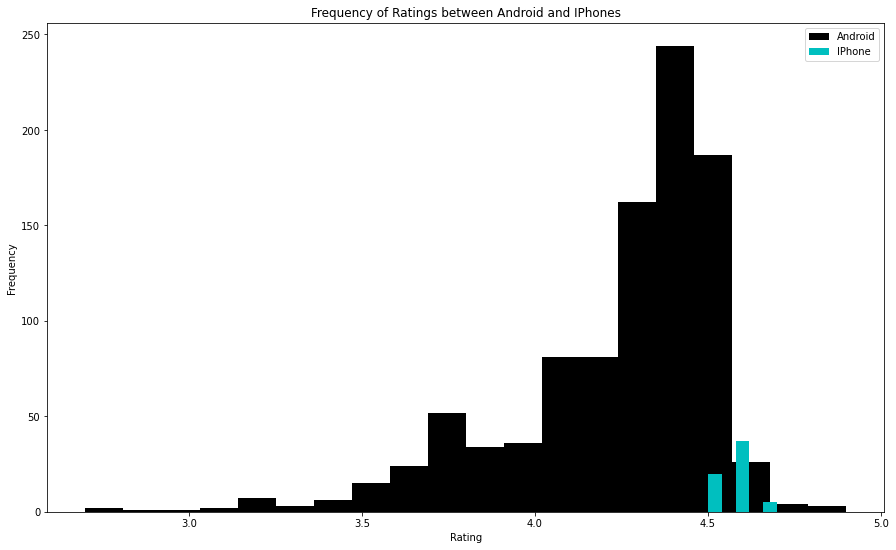

In [6]:
#histogram of ratings  adf vs idf
plt.rc('figure', figsize=(15, 9))

fig = plt.figure()
rate = fig.add_subplot(1, 1, 1)

rate.hist(adf['rating'], bins=20, color='k')
rate.hist(idf['Star Rating'], bins=5, color='c')

rate.set_title('Frequency of Ratings between Android and IPhones')
rate.set_xlabel('Rating')
rate.set_ylabel('Frequency')

rate.legend(['Android','IPhone'])

^^^ for this histogram plot I plotting the frequency of ratings between Androids and IPhones . I used the .hist function in matplotlib inorder to plot them and i used the respective series in each dataframe to obtain the data. This plot shows that although the Iphone sample size was smaller the ratings for apple device were generally higher and more consistent on average.

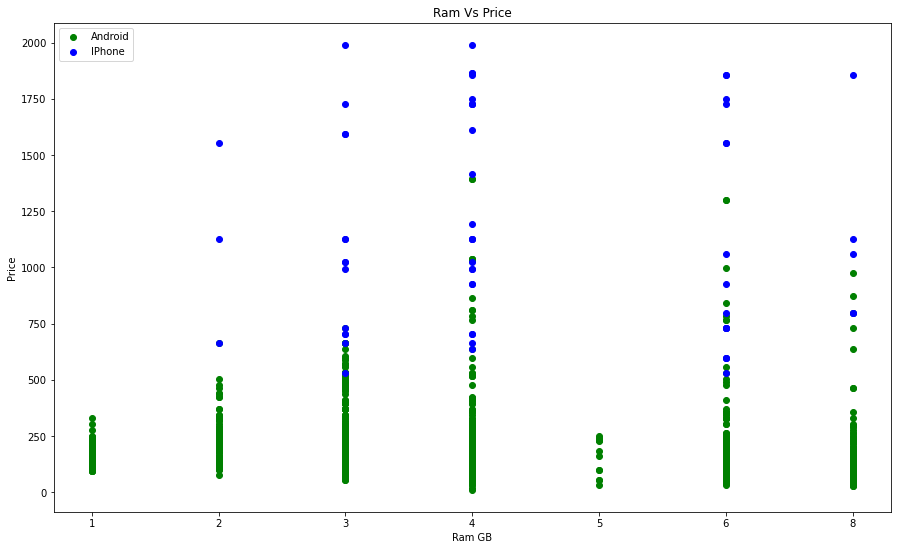

In [7]:
#scatter plot for ram vs price
plt.rc('figure', figsize=(15, 9))

fig = plt.figure()
ram = fig.add_subplot(1, 1, 1)
ram.scatter(adf['Ram'].sort_values() , adf['Price_USD'],color='g')
ram.scatter(idf['Ram'] , idf['Price_USD'],color='b')

ram.set_title('Ram Vs Price')
ram.set_xlabel('Ram GB')
ram.set_ylabel('Price')
ram.legend(['Android','IPhone'],loc='upper left')

^^^ For this scatter plot I used the .scatter function in matplotlib and used data from the respetive ['Ram'] series in each dataframe. This plots Ram vs Price for each mobile phone in both datasets and it shows that in general Androids provide more ram for dollar spent.

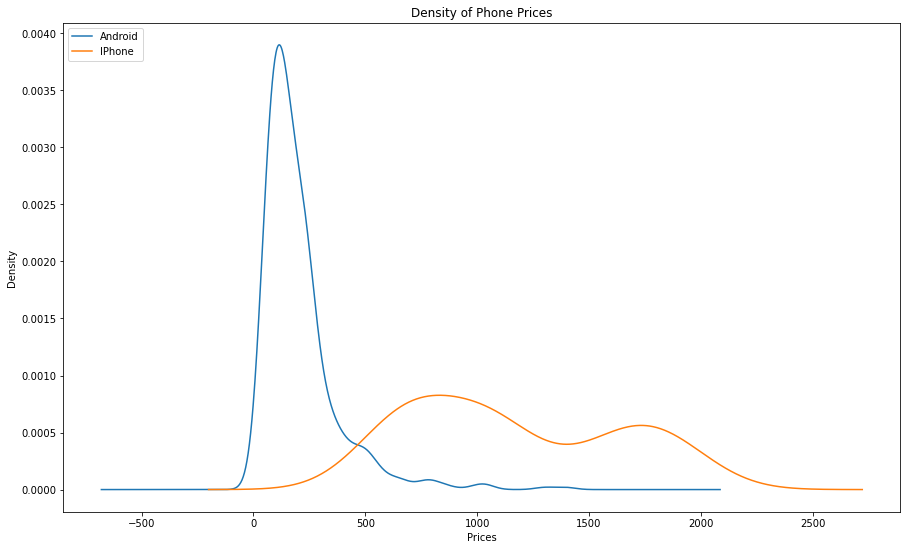

In [8]:
plt.rc('figure', figsize=(15, 9))

fig = plt.figure()
price= fig.add_subplot(1, 1, 1)

adf['Price_USD'].plot.density()
idf['Price_USD'].plot.density()
price.set_title('Density of Phone Prices')
price.set_xlabel('Prices')
price.set_ylabel('Density')
price.legend(['Android','IPhone'],loc='upper left')
#density plot

^^^ I uses seaborn to plot the density graphs for the prices of Androids and IPhones. The data used was just the ['Price_USD'] series in both datasets. This plot shows that most android devices have a similar price point while apple has a wide range with two central price points.

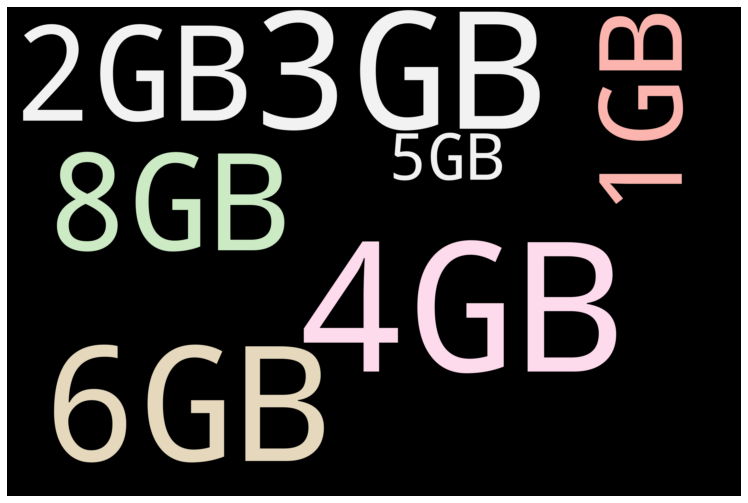

In [9]:
# Import package might need to 'pip install worldcloud'
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(idf['Ram'].str.cat(sep = 'GB ') +'GB ' + adf['Ram'].str.cat(sep = 'GB ') +'GB ')
# Plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


^^^  For the world cloud I had to pip install and import a package called worldcloud. Then I had to make a string of words from both the andriod and iphone datsets I ended up using the ['Ram'] series in both dataframes in order to achieve this. This worldcloud shows that 4GB is the most prevalent and 5GB is the least.

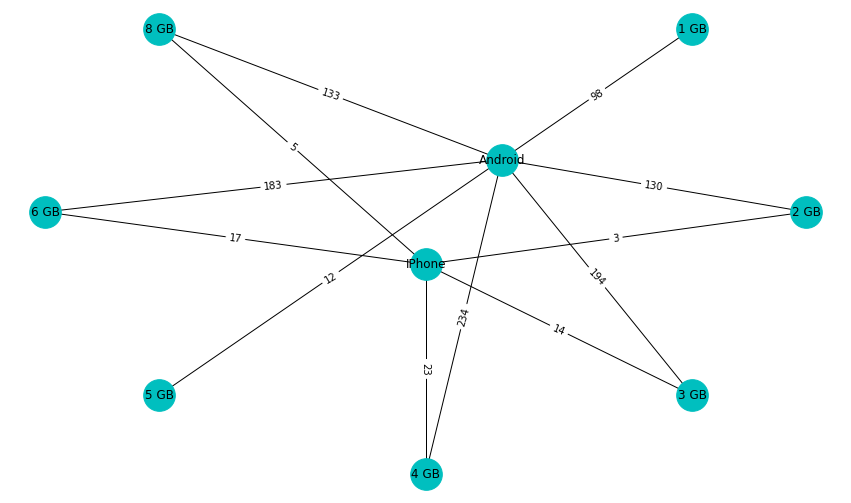

In [10]:
#graph for all phones with the same amount of ram
G = nx.Graph()
G.add_node('1 GB')
G.add_node('2 GB')
G.add_node('3 GB')
G.add_node('4 GB')
G.add_node('5 GB')
G.add_node('6 GB')
G.add_node('8 GB')

G.add_node('IPhone')
G.add_node('Android')

p = dict()
p['1 GB'] = (35, 35)
p['2 GB'] = (50, 0)
p['3 GB'] = (35, -35)
p['4 GB'] = (0,-50 )
p['5 GB'] = (-35, -35)
p['6 GB'] = (-50,0 )
p['8 GB'] = (-35,35 )

p['IPhone'] = (0, -10)
p['Android'] = (10, 10)


#adf['Ram'].value_counts(dropna=False)
#idf['Ram'].value_counts(dropna=False)
ram_num =  {
    ('Android', '1 GB'): 98, 
    ('Android', '2 GB'): 130, 
    ('Android', '3 GB'): 194, 
    ('Android', '4 GB'): 234, 
    ('Android', '5 GB'): 12, 
    ('Android', '6 GB'): 183, 
    ('Android', '8 GB'): 133, 

    ('IPhone', '2 GB'): 3, 
    ('IPhone', '3 GB'): 14, 
    ('IPhone', '4 GB'): 23, 
    ('IPhone', '6 GB'): 17, 
    ('IPhone', '8 GB'): 5, 


}

G.add_edges_from(ram_num)
nx.draw_networkx_edge_labels(G,p,ram_num)

nx.draw(G, p,
                 node_color='c', 
                 node_size=1000, 
                 with_labels=True)

# 1 2 3 4 5 6 8 gb ram

^^^ for this node network i had to use networkx to plot the nodes and edges and used "adf['Ram'].value_counts(dropna=False) and idf['Ram'].value_counts(dropna=False)" to count and label the edges of this graph. This graph shows that Androids have a wide array of ram configurations while IPhones do not.